In [4]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.68.1-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using 

In [6]:
#Loading Data
data = pd.read_csv("traffic.csv")
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [7]:
data["DateTime"]= pd.to_datetime(data["DateTime"])
data = data.drop(["ID"], axis=1) #dropping IDs
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 MB


Text(0.5, 0, 'Date')

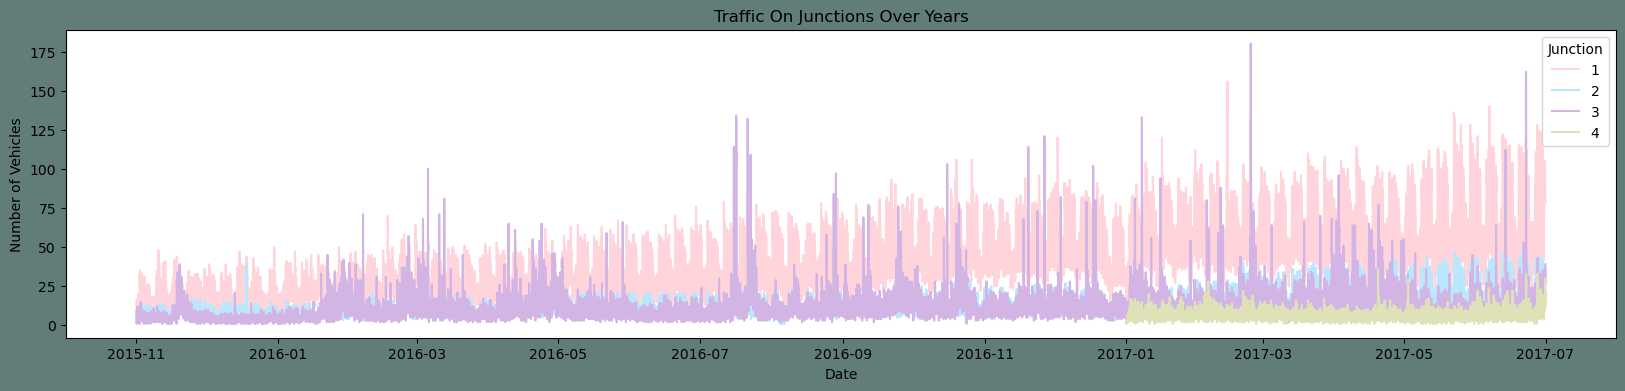

In [8]:
#df to be used for EDA
df=data.copy() 
#Let's plot the Timeseries
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]
plt.figure(figsize=(20,4),facecolor="#627D78")
Time_series=sns.lineplot(x=df['DateTime'],y="Vehicles",data=df, hue="Junction", palette=colors)
Time_series.set_title("Traffic On Junctions Over Years")
Time_series.set_ylabel("Number of Vehicles")
Time_series.set_xlabel("Date")

Text(0.5, 0, 'Date')

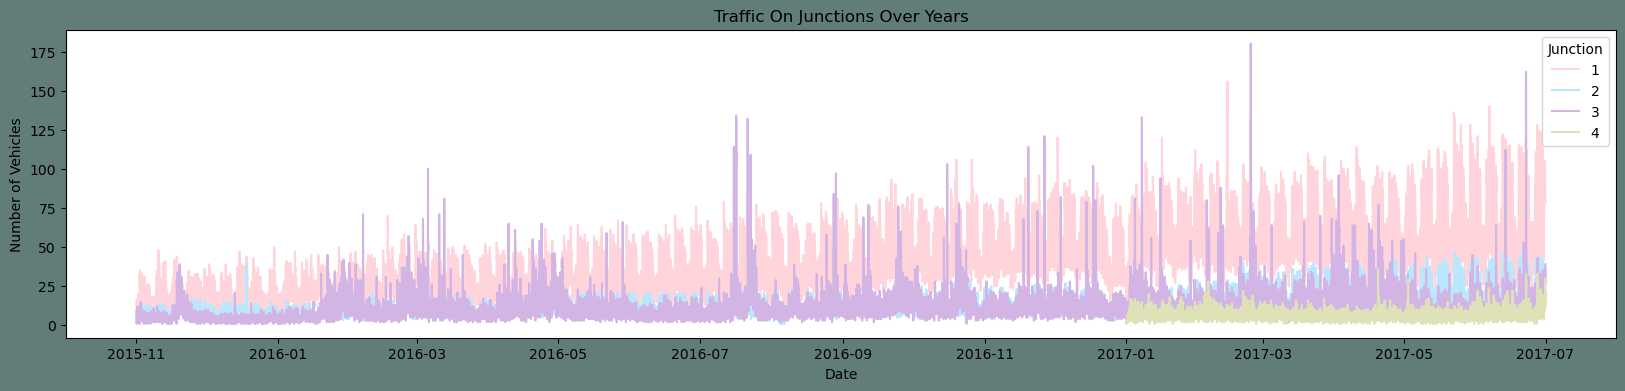

In [8]:
#df to be used for EDA
df=data.copy() 
#Let's plot the Timeseries
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]
plt.figure(figsize=(20,4),facecolor="#627D78")
Time_series=sns.lineplot(x=df['DateTime'],y="Vehicles",data=df, hue="Junction", palette=colors)
Time_series.set_title("Traffic On Junctions Over Years")
Time_series.set_ylabel("Number of Vehicles")
Time_series.set_xlabel("Date")

In [9]:
#Exploring more features 
df["Year"]= df['DateTime'].dt.year
df["Month"]= df['DateTime'].dt.month
df["Date_no"]= df['DateTime'].dt.day
df["Hour"]= df['DateTime'].dt.hour
df["Day"]= df.DateTime.dt.strftime("%A")
df.head()

,DateTime,Junction,Vehicles,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,2015,11,1,4,Sunday


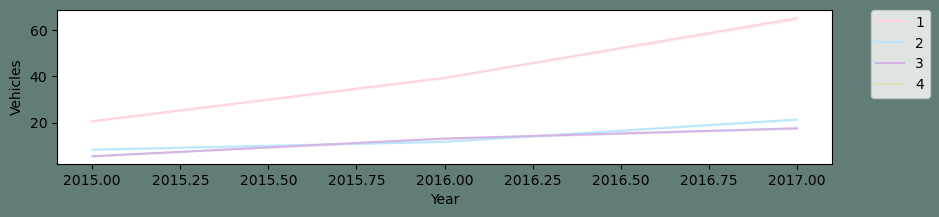

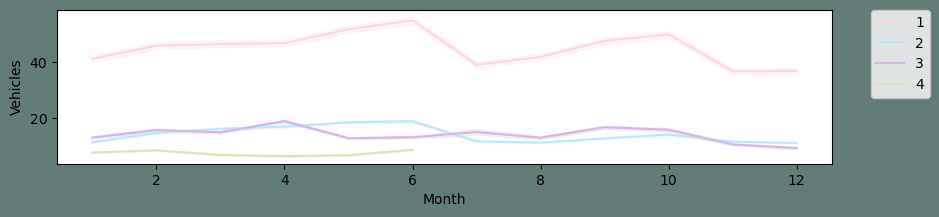

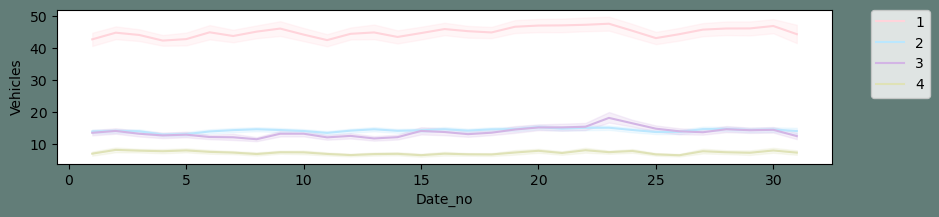

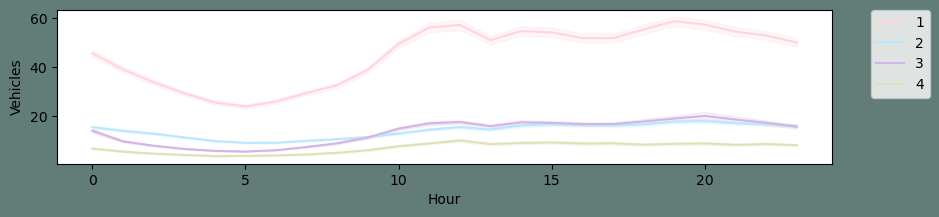

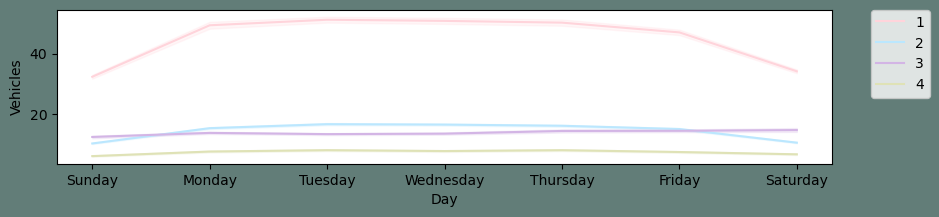

In [10]:
#Let's plot the Timeseries
new_features = [ "Year","Month", "Date_no", "Hour", "Day"]

for i in new_features:
    plt.figure(figsize=(10,2),facecolor="#627D78")
    ax=sns.lineplot(x=df[i],y="Vehicles",data=df, hue="Junction", palette=colors )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 0, 'Date')

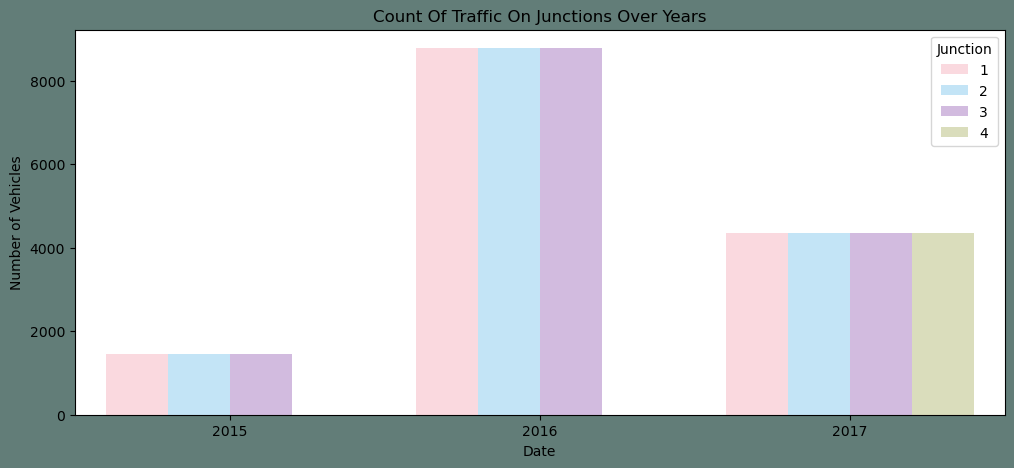

In [11]:
plt.figure(figsize=(12,5),facecolor="#627D78")
count = sns.countplot(data=df, x =df["Year"], hue="Junction", palette=colors)
count.set_title("Count Of Traffic On Junctions Over Years")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Date")

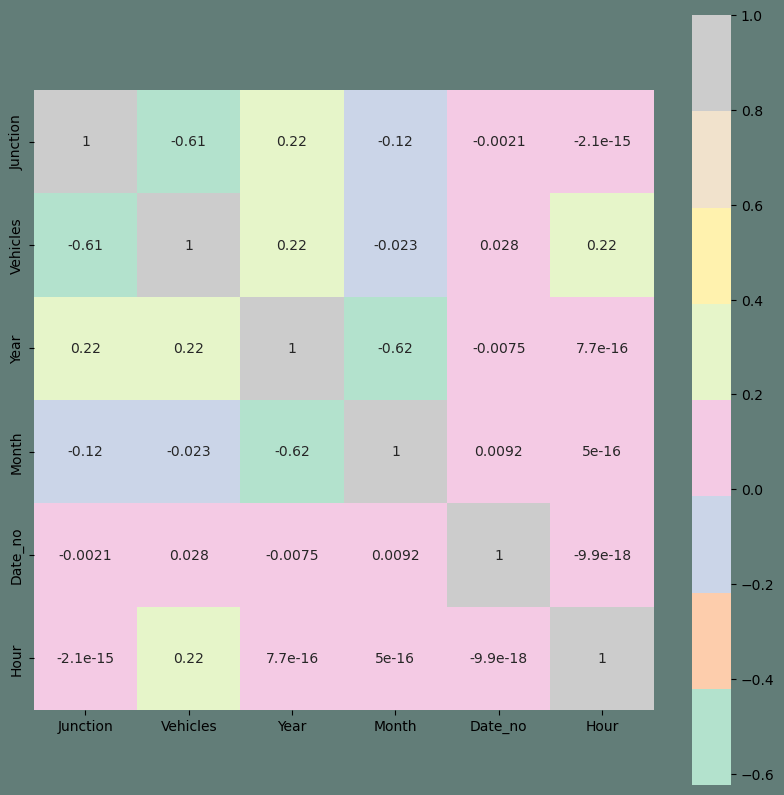

In [14]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
corrmat = numeric_df.corr()

# Plot the heatmap
plt.subplots(figsize=(10,10), facecolor="#627D78")
sns.heatmap(corrmat, cmap="Pastel2", annot=True, square=True)
plt.show()


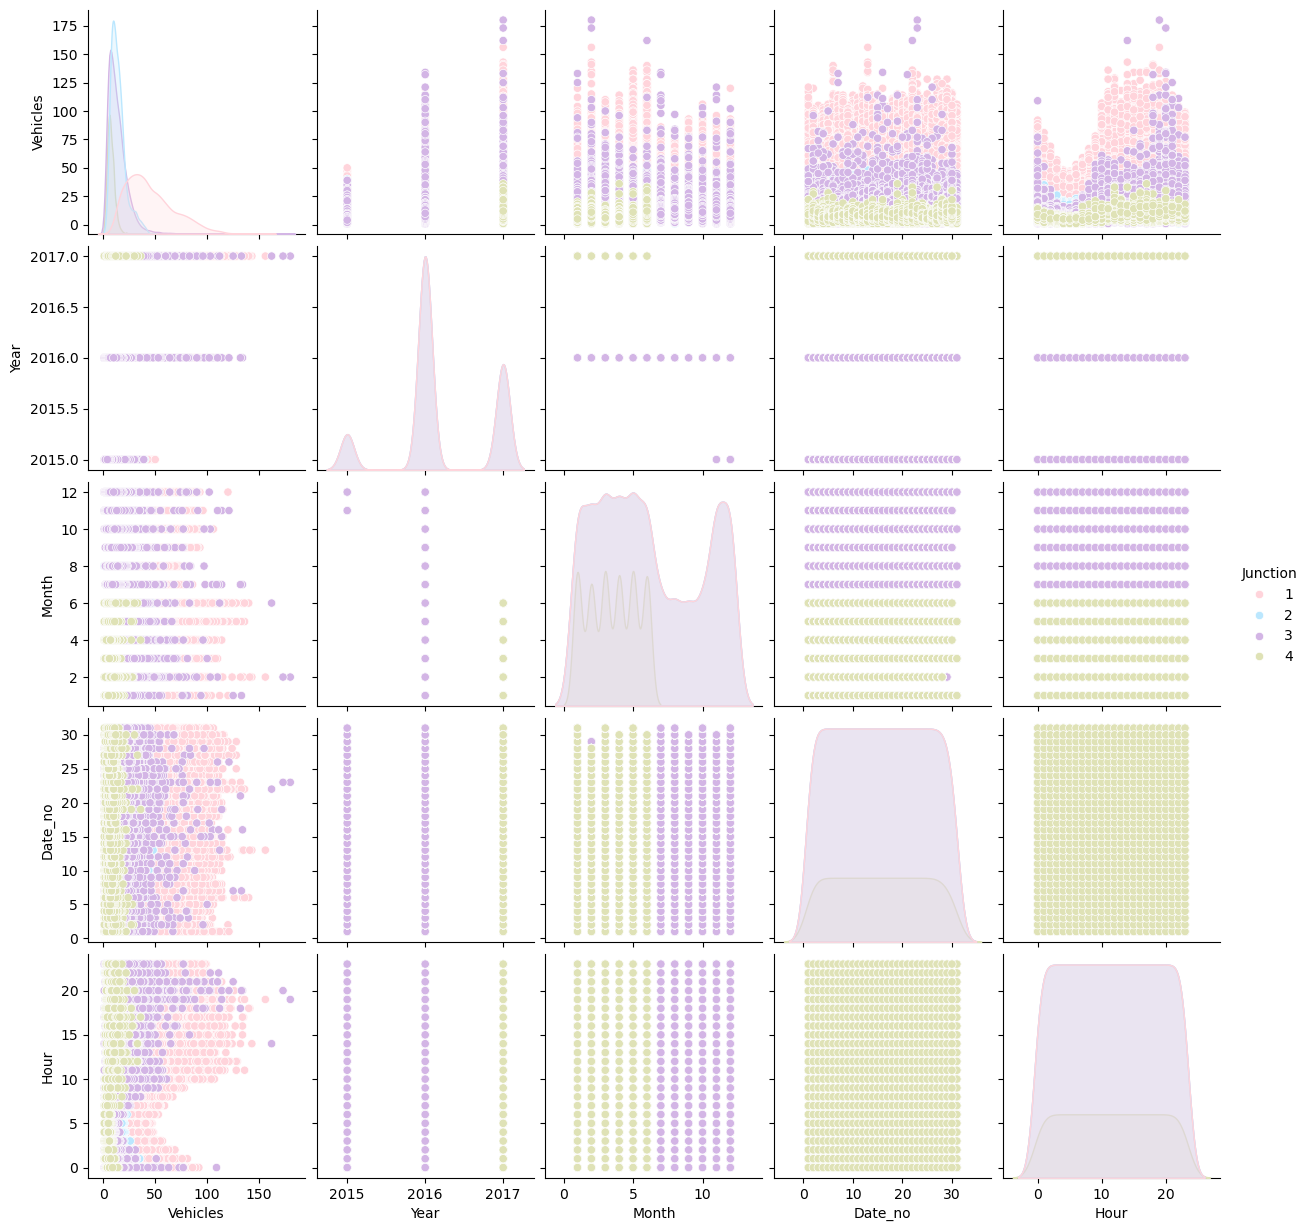

In [15]:
sns.pairplot(data=df, hue= "Junction",palette=colors)


In [16]:
#Pivoting data fron junction 
df_J = data.pivot(columns="Junction", index="DateTime")
df_J.describe()

Vehicles                                         
Junction             1             2             3            4
count     14592.000000  14592.000000  14592.000000  4344.000000
mean         45.052906     14.253221     13.694010     7.251611
std          23.008345      7.401307     10.436005     3.521455
min           5.000000      1.000000      1.000000     1.000000
25%          27.000000      9.000000      7.000000     5.000000
50%          40.000000     13.000000     11.000000     7.000000
75%          59.000000     17.000000     18.000000     9.000000
max         156.000000     48.000000    180.000000    36.000000

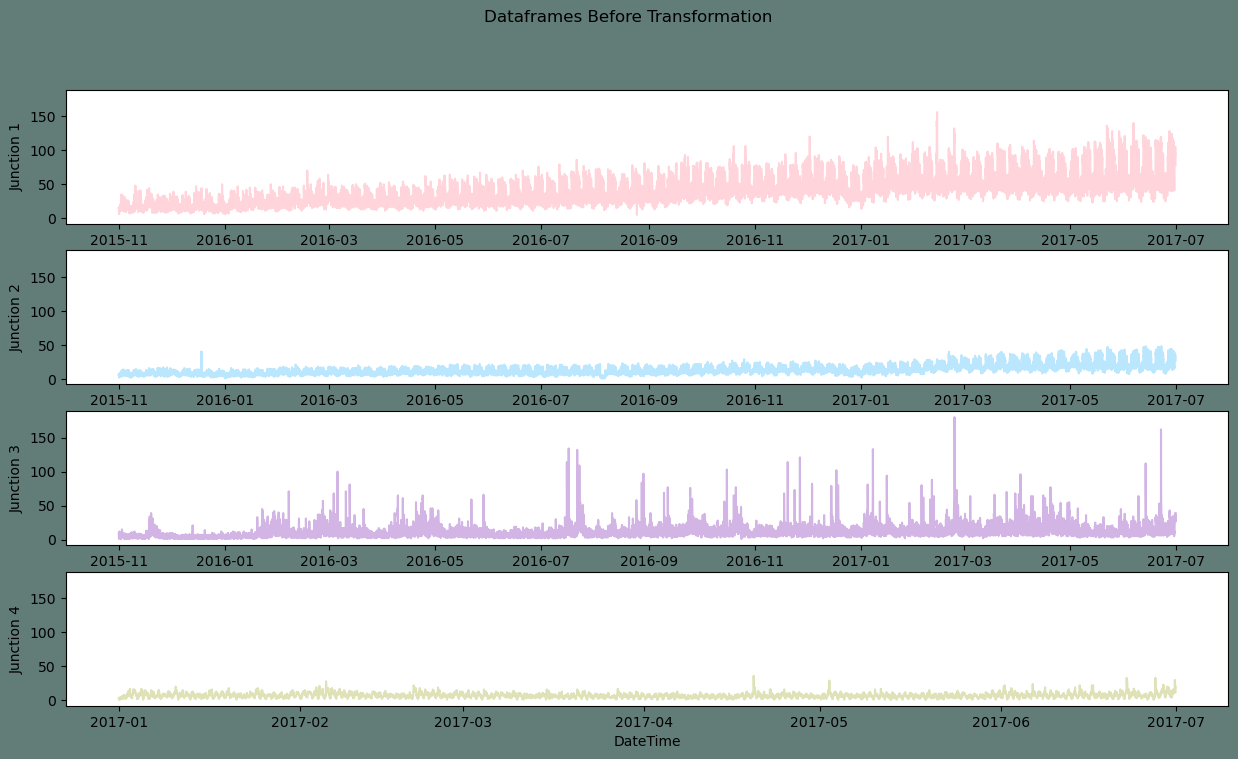

In [17]:
#Creating new sets
df_1 = df_J[[('Vehicles', 1)]]
df_2 = df_J[[('Vehicles', 2)]]
df_3 = df_J[[('Vehicles', 3)]]
df_4 = df_J[[('Vehicles', 4)]]
df_4 = df_4.dropna() #Junction 4 has limited data only for a few months

#Dropping level one in dfs's index as it is a multi index data frame
list_dfs = [df_1, df_2, df_3, df_4]
for i in list_dfs:
    i.columns= i.columns.droplevel(level=1)   

#Function to plot comparitive plots of dataframes
def Sub_Plots4(df_1, df_2,df_3,df_4,title):
    fig, axes = plt.subplots(4, 1, figsize=(15, 8),facecolor="#627D78", sharey=True)
    fig.suptitle(title)
    #J1
    pl_1=sns.lineplot(ax=axes[0],data=df_1,color=colors[0])
    #pl_1=plt.ylabel()
    axes[0].set(ylabel ="Junction 1")
    #J2
    pl_2=sns.lineplot(ax=axes[1],data=df_2,color=colors[1])
    axes[1].set(ylabel ="Junction 2")
    #J3
    pl_3=sns.lineplot(ax=axes[2],data=df_3,color=colors[2])
    axes[2].set(ylabel ="Junction 3")
    #J4
    pl_4=sns.lineplot(ax=axes[3],data=df_4,color=colors[3])
    axes[3].set(ylabel ="Junction 4")
    
    
#Plotting the dataframe to check for stationarity
Sub_Plots4(df_1.Vehicles, df_2.Vehicles,df_3.Vehicles,df_4.Vehicles,"Dataframes Before Transformation")

In [18]:
# Normalize Function
def Normalize(df,col):
    average = df[col].mean()
    stdev = df[col].std()
    df_normalized = (df[col] - average) / stdev
    df_normalized = df_normalized.to_frame()
    return df_normalized, average, stdev

# Differencing Function
def Difference(df,col, interval):
    diff = []
    for i in range(interval, len(df)):
        value = df[col][i] - df[col][i - interval]
        diff.append(value)
    return diff

In [19]:
#Normalizing and Differencing to make the series stationary 
df_N1, av_J1, std_J1 = Normalize(df_1, "Vehicles")
Diff_1 = Difference(df_N1, col="Vehicles", interval=(24*7)) #taking a week's diffrence
df_N1 = df_N1[24*7:]
df_N1.columns = ["Norm"]
df_N1["Diff"]= Diff_1

df_N2, av_J2, std_J2 = Normalize(df_2, "Vehicles")
Diff_2 = Difference(df_N2, col="Vehicles", interval=(24)) #taking a day's diffrence
df_N2 = df_N2[24:]
df_N2.columns = ["Norm"]
df_N2["Diff"]= Diff_2

df_N3, av_J3, std_J3 = Normalize(df_3, "Vehicles")
Diff_3 = Difference(df_N3, col="Vehicles", interval=1) #taking an hour's diffrence
df_N3 = df_N3[1:]
df_N3.columns = ["Norm"]
df_N3["Diff"]= Diff_3

df_N4, av_J4, std_J4 = Normalize(df_4, "Vehicles")
Diff_4 = Difference(df_N4, col="Vehicles", interval=1) #taking an hour's diffrence
df_N4 = df_N4[1:]
df_N4.columns = ["Norm"]
df_N4["Diff"]= Diff_4

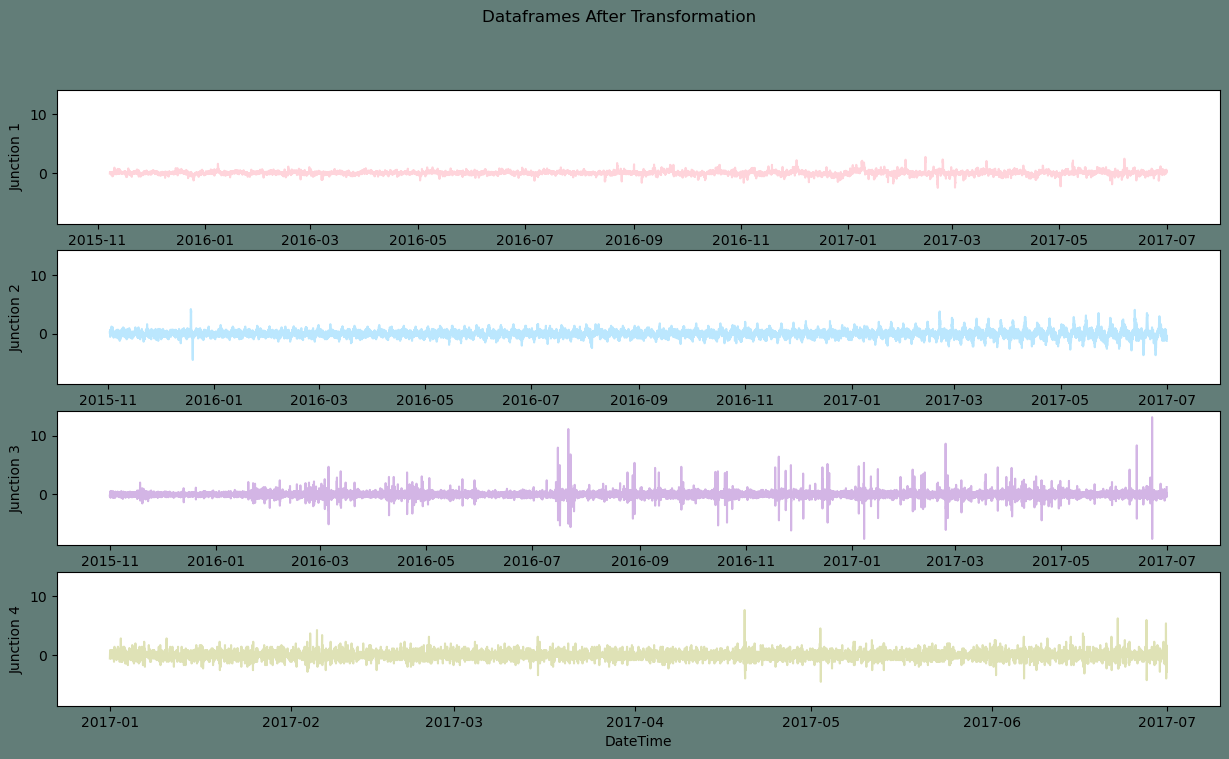

In [20]:
Sub_Plots4(df_N1.Diff, df_N2.Diff,df_N3.Diff,df_N4.Diff,"Dataframes After Transformation")

In [21]:
#Stationary Check for the time series Augmented Dickey Fuller test
def Stationary_check(df):
    check = adfuller(df.dropna())
    print(f"ADF Statistic: {check[0]}")
    print(f"p-value: {check[1]}")
    print("Critical Values:")
    for key, value in check[4].items():
        print('\t%s: %.3f' % (key, value))
    if check[0] > check[4]["1%"]:
        print("Time Series is Non-Stationary")
    else:
        print("Time Series is Stationary") 
  

#Checking if the series is stationary

List_df_ND = [ df_N1["Diff"], df_N2["Diff"], df_N3["Diff"], df_N4["Diff"]] 
print("Checking the transformed series for stationarity:")
for i in List_df_ND:
    print("\n")
    Stationary_check(i)

Checking the transformed series for stationarity:


ADF Statistic: -15.265303390415559
p-value: 4.798539876395033e-28
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -21.79589102694005
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -28.00175990883257
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -17.979092563052447
p-value: 2.778787532595102e-30
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Time Series is Stationary


In [22]:
#Differencing created some NA values as we took a weeks data into consideration while difrencing
df_J1 = df_N1["Diff"].dropna()
df_J1 = df_J1.to_frame()

df_J2 = df_N2["Diff"].dropna()
df_J2 = df_J2.to_frame()

df_J3 = df_N3["Diff"].dropna()
df_J3 = df_J3.to_frame()

df_J4 = df_N4["Diff"].dropna()
df_J4 = df_J4.to_frame()

#Splitting the dataset
def Split_data(df):
    training_size = int(len(df)*0.90)
    data_len = len(df)
    train, test = df[0:training_size],df[training_size:data_len] 
    train, test = train.values.reshape(-1, 1), test.values.reshape(-1, 1)
    return train, test
#Splitting the training and test datasets 
J1_train, J1_test = Split_data(df_J1)
J2_train, J2_test = Split_data(df_J2)
J3_train, J3_test = Split_data(df_J3)
J4_train, J4_test = Split_data(df_J4)

#Target and Feature
def TnF(df):
    end_len = len(df)
    X = []
    y = []
    steps = 32
    for i in range(steps, end_len):
        X.append(df[i - steps:i, 0])
        y.append(df[i, 0])
    X, y = np.array(X), np.array(y)
    return X ,y

#fixing the shape of X_test and X_train
def FeatureFixShape(train, test):
    train = np.reshape(train, (train.shape[0], train.shape[1], 1))
    test = np.reshape(test, (test.shape[0],test.shape[1],1))
    return train, test

#Assigning features and target 
X_trainJ1, y_trainJ1 = TnF(J1_train)
X_testJ1, y_testJ1 = TnF(J1_test)
X_trainJ1, X_testJ1 = FeatureFixShape(X_trainJ1, X_testJ1)

X_trainJ2, y_trainJ2 = TnF(J2_train)
X_testJ2, y_testJ2 = TnF(J2_test)
X_trainJ2, X_testJ2 = FeatureFixShape(X_trainJ2, X_testJ2)

X_trainJ3, y_trainJ3 = TnF(J3_train)
X_testJ3, y_testJ3 = TnF(J3_test)
X_trainJ3, X_testJ3 = FeatureFixShape(X_trainJ3, X_testJ3)

X_trainJ4, y_trainJ4 = TnF(J4_train)
X_testJ4, y_testJ4 = TnF(J4_test)
X_trainJ4, X_testJ4 = FeatureFixShape(X_trainJ4, X_testJ4)

In [23]:
#Model for the prediction
def GRU_model(X_Train, y_Train, X_Test):
    early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=10, restore_best_weights=True) 
    #callback delta 0.01 may interrupt the learning, could eliminate this step, but meh!
    
    #The GRU model 
    model = Sequential()
    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    #model.add(GRU(units=50, return_sequences=True,  input_shape=(X_Train.shape[1],1),activation='tanh'))
    #model.add(Dropout(0.2))
    model.add(GRU(units=50, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    #Compiling the model
    model.compile(optimizer=SGD(decay=1e-7, momentum=0.9),loss='mean_squared_error')
    model.fit(X_Train,y_Train, epochs=50, batch_size=150,callbacks=[early_stopping])
    pred_GRU= model.predict(X_Test)
    return pred_GRU

#To calculate the root mean squred error in predictions
def RMSE_Value(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

#To plot the comparitive plot of targets and predictions
def PredictionsPlot(test,predicted,m):
    plt.figure(figsize=(12,5),facecolor="#627D78")
    plt.plot(test, color=colors[m],label="True Value",alpha=0.5 )
    plt.plot(predicted, color="#627D78",label="Predicted Values")
    plt.title("GRU Traffic Prediction Vs True values")
    plt.xlabel("DateTime")
    plt.ylabel("Number of Vehicles")
    plt.legend()
    plt.show()

In [24]:
#Predictions For First Junction
PredJ1 = GRU_model(X_trainJ1,y_trainJ1,X_testJ1)

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 33s 238ms/step - loss: 0.0822
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 19s 221ms/step - loss: 0.0645
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 19s 214ms/step - loss: 0.0641
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 19s 220ms/step - loss: 0.0594
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 19s 215ms/step - loss: 0.0602
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 18s 212ms/step - loss: 0.0611
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 19s 217ms/step - loss: 0.0589
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 18s 212ms/step - loss: 0.0557
Epoch 9/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 19s 213ms/step - loss: 0.0566
Epoch 10/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 19s 214ms/step - loss: 0.0576
Epoch 11/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 19s 220ms/step - loss: 0.0539
Epoch 12/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 18s 212ms/step - loss: 0.0564
Epoch 13/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 18s 209ms/step - loss: 0.0552
Epoch 14/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 19s 215ms/step - loss: 0.0545
Epoch 15/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 19s 

The root mean squared error is 0.24576596774324014.


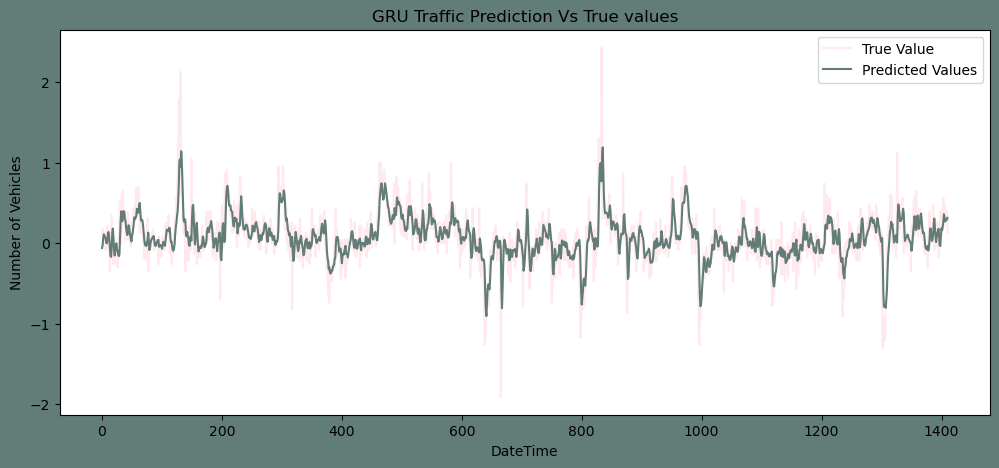

In [25]:
#Results for J1 
RMSE_J1=RMSE_Value(y_testJ1,PredJ1)
PredictionsPlot(y_testJ1,PredJ1,0)

In [26]:
#Predictions For Second Junction
PredJ2 = GRU_model(X_trainJ2,y_trainJ2,X_testJ2)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 33s 231ms/step - loss: 0.2469
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 21s 233ms/step - loss: 0.2016
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 21s 233ms/step - loss: 0.2059
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 20s 225ms/step - loss: 0.2010
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 20s 228ms/step - loss: 0.1952
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 20s 223ms/step - loss: 0.1915
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 19s 218ms/step - loss: 0.1888
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 19s 215ms/step - loss: 0.1946
Epoch 9/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 19s 218ms/step - loss: 0.1863
Epoch 10/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 20s 222ms/step - loss: 0.1904
Epoch 11/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 19s 217ms/step - loss: 0.1889
Epoch 12/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 19s 216ms/step - loss: 0.1878
Epoch 13/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 19s 216ms/step - loss: 0.1862
Epoch 14/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 19s 215ms/step - loss: 0.1828
Epoch 15/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 19s 

The root mean squared error is 0.5589141221776115.


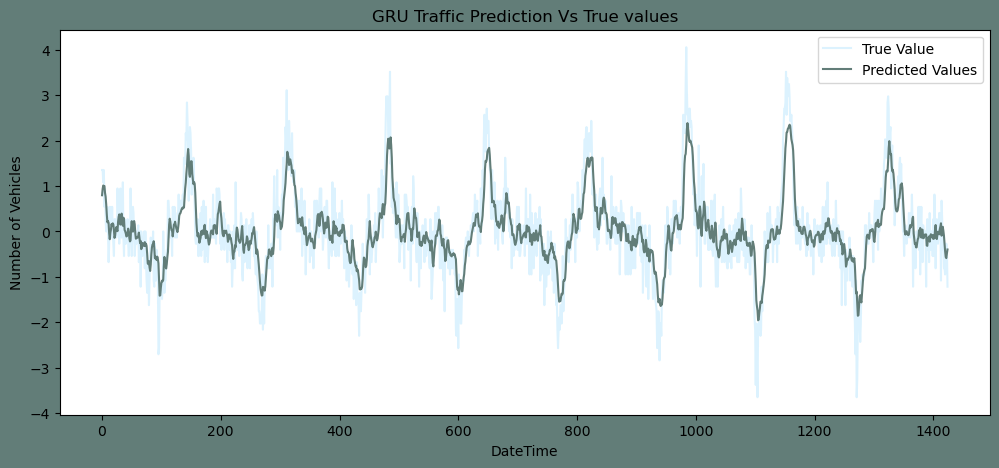

In [27]:
#Results for J2
RMSE_J2=RMSE_Value(y_testJ2,PredJ2)
PredictionsPlot(y_testJ2,PredJ2,1)

In [28]:
#Predictions For Third Junction
PredJ3 = GRU_model(X_trainJ3,y_trainJ3,X_testJ3) 

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 16s 115ms/step - loss: 0.2846
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 0.3003
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 0.3082
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 0.3003
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 0.2821
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - loss: 0.2920
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - loss: 0.2818
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 0.2799
Epoch 9/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - loss: 0.3043
Epoch 10/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - loss: 0.2872
Epoch 11/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 0.2828
Epoch 12/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 0.2890
Epoch 13/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - loss: 0.3045
Epoch 14/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - loss: 0.2505
Epoch 15/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 

The root mean squared error is 0.6080533843765298.


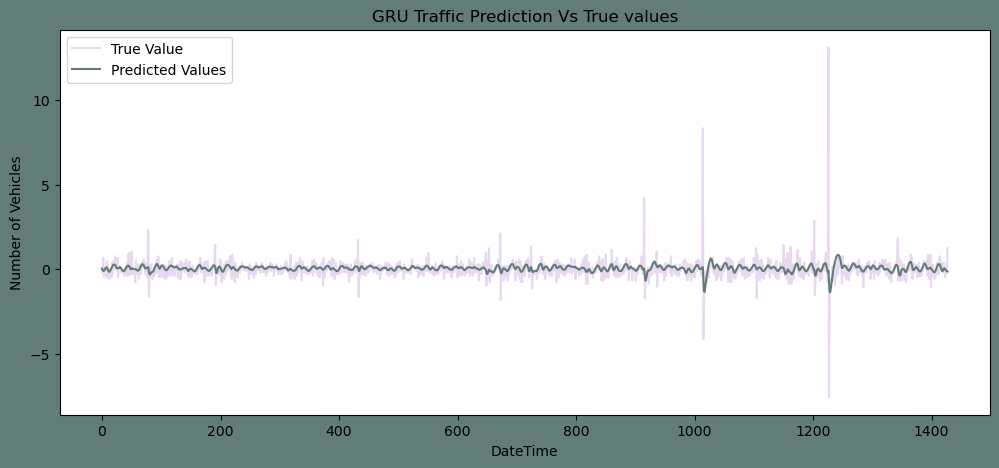

In [29]:
#Results for J3
RMSE_J3=RMSE_Value(y_testJ3,PredJ3)
PredictionsPlot(y_testJ3,PredJ3,2)

In [30]:
#Predictions For Forth Junction
PredJ4 = GRU_model(X_trainJ4,y_trainJ4,X_testJ4)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - loss: 0.6593
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.6655
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 0.7238
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - loss: 0.6662
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - loss: 0.6871
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.6478
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 0.6799
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.6845
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.6697
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.6928
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 0.6373
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 0.6514
Epoch 13/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.6663
Epoch 14/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.6984
Epoch 15/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - l

The root mean squared error is 0.998169350328277.


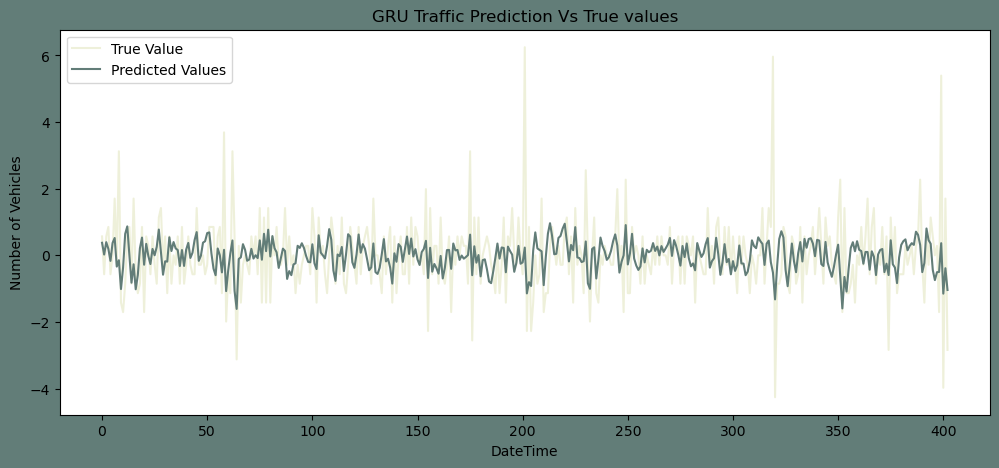

In [31]:
#Results for J4
RMSE_J4=RMSE_Value(y_testJ4,PredJ4)
PredictionsPlot(y_testJ4,PredJ4,3)

In [34]:
# Functions to inverse transforms and Plot comparitive plots
# invert differenced forecast
def inverse_difference(last_ob, value):
    inversed = value + last_ob
    return inversed
#Plotting the comparison
def Sub_Plots2(df_1, df_2,title,m):
    fig, axes = plt.subplots(1, 2, figsize=(18,4), sharey=True,facecolor="#627D78")
    fig.suptitle(title)
    
    pl_1=sns.lineplot(ax=axes[0],data=df_1,color=colors[m])
    axes[0].set(ylabel ="Prediction")
    
    pl_2=sns.lineplot(ax=axes[1],data=df_2["Vehicles"],color="#627D78")
    axes[1].set(ylabel ="Orignal")

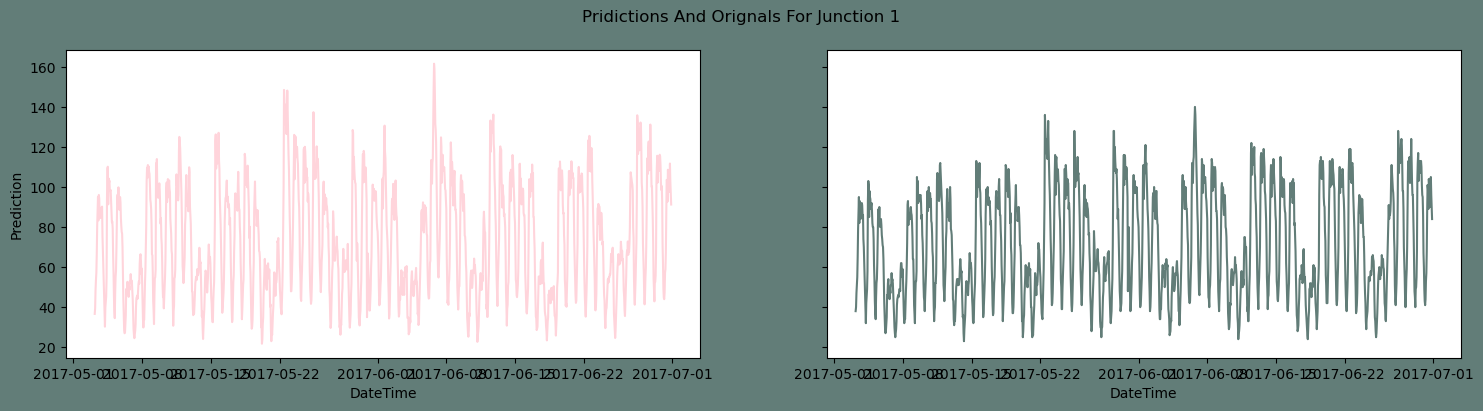

In [35]:
# invert the differenced forecast for Junction 1 
recover1 = df_N1.Norm[-1412:-1].to_frame()
recover1["Pred"]= PredJ1
Transform_reverssed_J1 = inverse_difference(recover1.Norm, recover1.Pred).to_frame()
Transform_reverssed_J1.columns = ["Pred_Normed"]
#Invert the normalizeation J1
Final_J1_Pred = (Transform_reverssed_J1.values* std_J1) + av_J1
Transform_reverssed_J1["Pred_Final"] =Final_J1_Pred
#Plotting the Predictions with orignals 
Sub_Plots2(Transform_reverssed_J1["Pred_Final"], df_1[-1412:-1],"Pridictions And Orignals For Junction 1", 0)

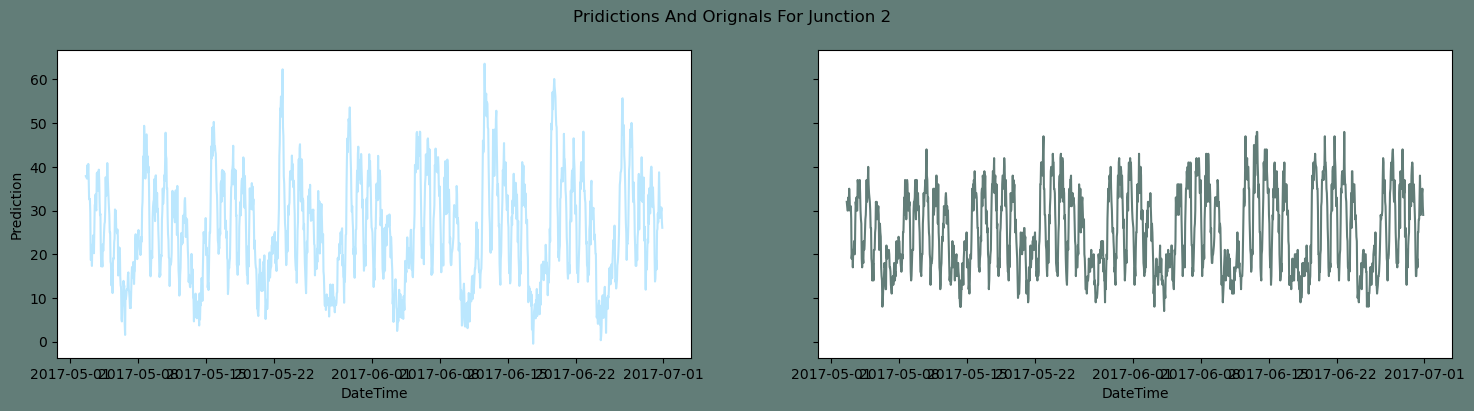

In [36]:
#Invert the differenced J2
recover2 = df_N2.Norm[-1426:-1].to_frame() #len as per the diff
recover2["Pred"]= PredJ2
Transform_reverssed_J2 = inverse_difference(recover2.Norm, recover2.Pred).to_frame()
Transform_reverssed_J2.columns = ["Pred_Normed"]
Final_J2_Pred = (Transform_reverssed_J2.values* std_J2) + av_J2
Transform_reverssed_J2["Pred_Final"] =Final_J2_Pred
#Plotting the Predictions with orignals 
Sub_Plots2(Transform_reverssed_J2["Pred_Final"], df_2[-1426:-1],"Pridictions And Orignals For Junction 2", 1)

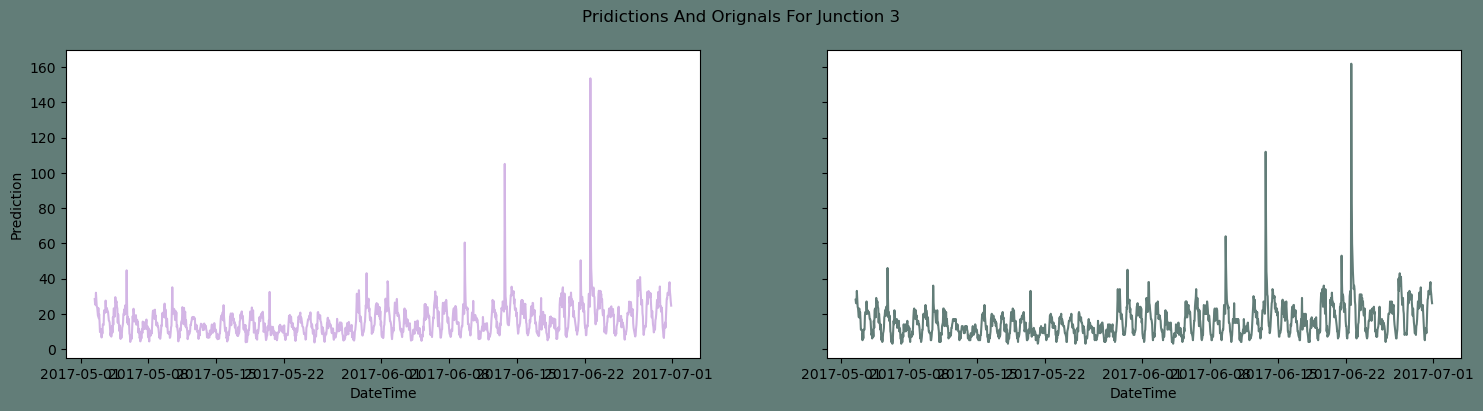

In [37]:
#Invert the differenced J3
recover3 = df_N3.Norm[-1429:-1].to_frame() #len as per the diff
recover3["Pred"]= PredJ3
Transform_reverssed_J3 = inverse_difference(recover3.Norm, recover3.Pred).to_frame()
Transform_reverssed_J3.columns = ["Pred_Normed"]
#Invert the normalizeation J3
Final_J3_Pred = (Transform_reverssed_J3.values* std_J3) + av_J3
Transform_reverssed_J3["Pred_Final"] =Final_J3_Pred
Sub_Plots2(Transform_reverssed_J3["Pred_Final"], df_3[-1429:-1],"Pridictions And Orignals For Junction 3", 2)

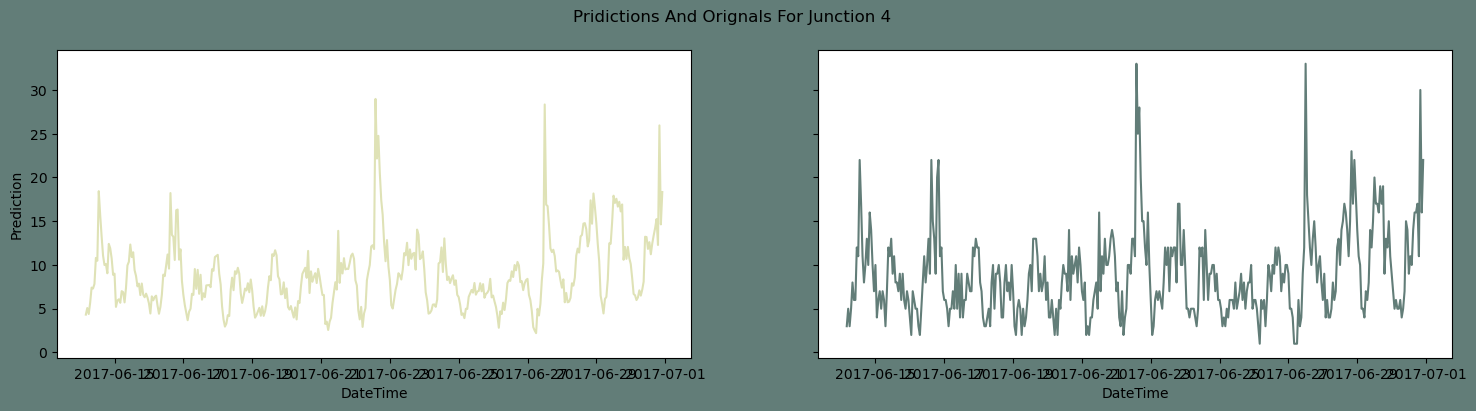

In [38]:
#Invert the differenced J4
recover4 = df_N4.Norm[-404:-1].to_frame()  #len as per the testset
recover4["Pred"]= PredJ4
Transform_reverssed_J4 = inverse_difference(recover4.Norm, recover4.Pred).to_frame()
Transform_reverssed_J4.columns = ["Pred_Normed"]
#Invert the normalizeation J4
Final_J4_Pred = (Transform_reverssed_J4.values* std_J4) + av_J4
Transform_reverssed_J4["Pred_Final"] =Final_J4_Pred
Sub_Plots2(Transform_reverssed_J4["Pred_Final"], df_4[-404:-1],"Pridictions And Orignals For Junction 4", 3)

In [44]:
# Stylish table using pandas
rmse_table.style.set_table_styles(
    [
        {"selector": "thead th", "props": [("background-color", "#20B2AA"), ("color", "white"), ("font-weight", "bold")]},
        {"selector": "tbody td", "props": [("border", "1px solid #ddd"), ("text-align", "center")]},
    ]
).set_properties(**{"text-align": "center"})


,Junction,RMSE
0,Junction 1,0.245766
1,Junction 2,0.558914
2,Junction 3,0.608053
3,Junction 4,0.998169


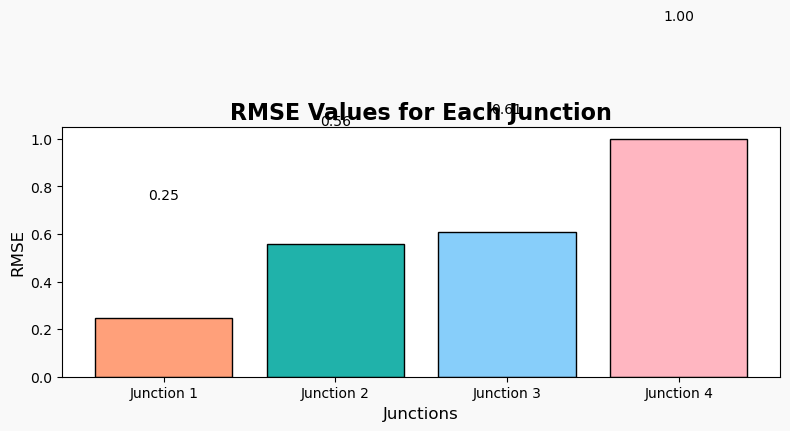

In [45]:
import matplotlib.pyplot as plt

# Data for the chart
junctions = ["Junction 1", "Junction 2", "Junction 3", "Junction 4"]
rmse_values = [RMSE_J1, RMSE_J2, RMSE_J3, RMSE_J4]

# Create the bar chart
plt.figure(figsize=(8, 5), facecolor="#F9F9F9")
plt.bar(junctions, rmse_values, color=["#FFA07A", "#20B2AA", "#87CEFA", "#FFB6C1"], edgecolor="black")

# Add titles and labels
plt.title("RMSE Values for Each Junction", fontsize=16, fontweight="bold")
plt.ylabel("RMSE", fontsize=12)
plt.xlabel("Junctions", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Annotate the bars with RMSE values
for i, v in enumerate(rmse_values):
    plt.text(i, v + 0.5, f"{v:.2f}", ha="center", fontsize=10)

# Display the chart
plt.tight_layout()
plt.show()
